In [5]:
import sys
sys.path.insert(0,'classes/')
from grafica import *
from ClassPerceptron import Perceptron

In [6]:
%matplotlib inline
import numpy as np
import pandas as pandas
import time
from sklearn.model_selection import train_test_split
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

In [7]:
#LOAD DATASET
df_products = pandas.read_csv('data/products.csv')

In [8]:
#NUMERIZATION
df_products['DESCUENTO'] = df_products['DESCUENTO'].map({'BAJO' : 0, 'MEDIO' : 25, 'ALTO' : 50})
df_products['ENVIO_SUPERIOR'] = df_products['ENVIO'].map({'NORMAL' : 0, 'SUPERIOR' : 1})
df_products = df_products.drop(columns='ENVIO')

In [9]:
df_products['UNIDADES'].mean()

45.77777777777778

In [10]:
df_products['UNIDADES'].std()

36.785791339108705

In [11]:
df_products['DESCUENTO'].mean()

25.0

In [12]:
df_products['DESCUENTO'].std()

21.650635094610966

In [13]:
#NORMALIZATION
df_products['UNIDADES'] = (df_products['UNIDADES'] - df_products['UNIDADES'].mean()) / (df_products['UNIDADES'].std())
df_products['DESCUENTO'] = (df_products['DESCUENTO'] - df_products['DESCUENTO'].mean()) / (df_products['DESCUENTO'].std())

In [14]:
#PRINT COMPLETE DATAFRAME
df_products.head(10)

,UNIDADES,DESCUENTO,ENVIO_SUPERIOR
0,-0.700754,-1.154701,0
1,-0.456094,0.000000,0
2,-0.021143,-1.154701,1
3,-0.428910,1.154701,1
4,-0.428910,0.000000,0
5,-1.190073,-1.154701,0
6,1.202155,1.154701,1
7,2.017687,1.154701,1
8,0.006041,0.000000,1


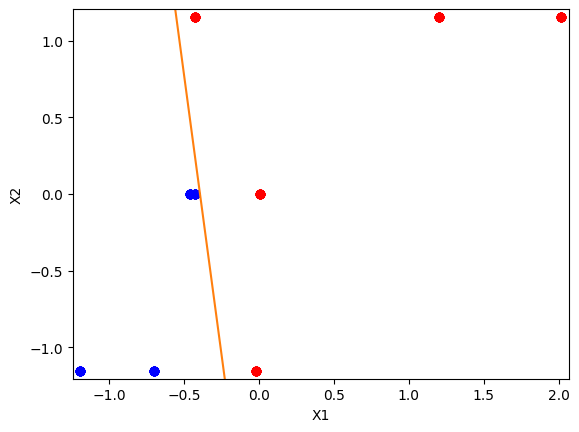

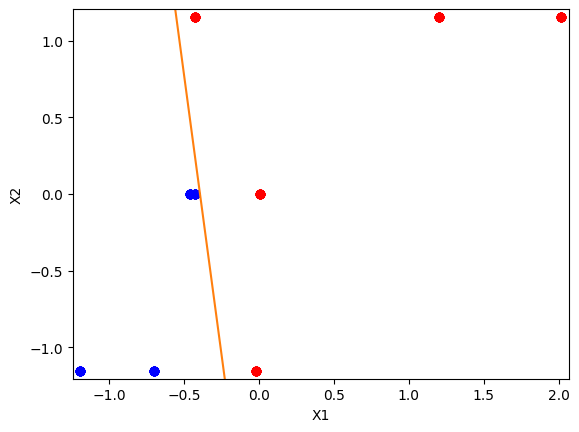

In [15]:
# --- utilice random_state=None para que los pesos se inicializacen en forma aleatoria --
perceptron = Perceptron(alpha=0.1, n_iter=100, draw=1, title=['X1', 'X2'], random_state=None)
#FIT
x = df_products.drop(columns='ENVIO_SUPERIOR').to_numpy()
t = df_products['ENVIO_SUPERIOR'].to_numpy()
perceptron.fit(x, t)

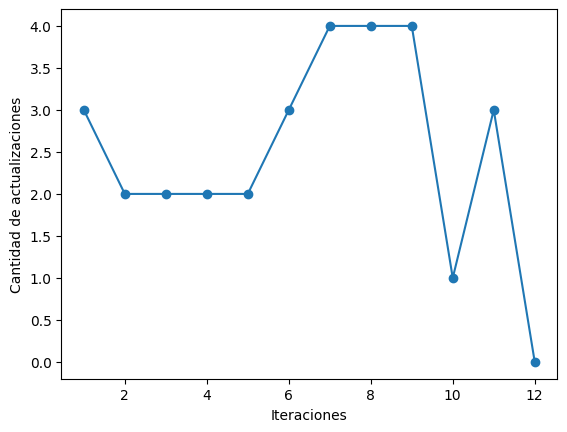

In [16]:
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

/home/nahuel/Desktop/Deep-Learning-Course/2. Perceptron/classes/PlotRegiones.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


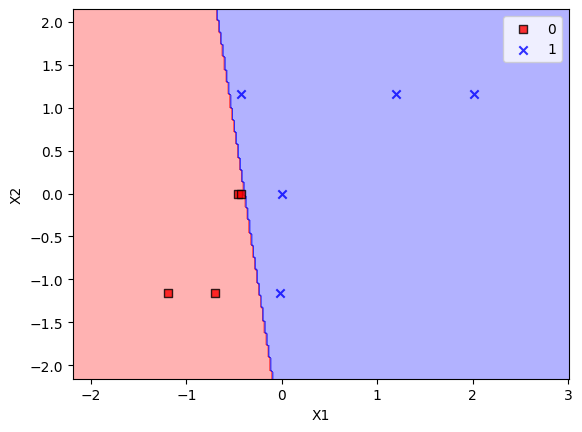

In [17]:
from PlotRegiones import plot_decision_regions

plot_decision_regions(x, t, classifier=perceptron)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right')
plt.show()

In [18]:
y = perceptron.predict(x)
print("Y = ", y)
print("T = ", t)
aciertos = sum(y == t)
print("aciertos = ", aciertos)
nAciertos = sum(y == t)
print("%% de aciertos = %.2f %%" % (100*nAciertos/x.shape[0]))


Y =  [0 0 1 1 0 0 1 1 1]
T =  [0 0 1 1 0 0 1 1 1]
aciertos =  9
% de aciertos = 100.00 %
